In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.metrics import plot_confusion_matrix

### Create a query to get the total amount of rentals in June for each film

In [3]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.title, COUNT(DISTINCT r.rental_id) as n_rents_june, r.rental_date, f.rental_duration, f.release_year, f.rental_rate, f.length, f.rating, f.special_features, c.name as category_name
FROM rental as r
JOIN inventory as i
ON r.inventory_id =i.inventory_id
JOIN film as f
ON i.film_id=f.film_id
JOIN film_category as fc
ON f.film_id =fc.film_id
JOIN category as c
ON fc.category_id = c.category_id
WHERE r.rental_date BETWEEN '2005-06-01 00:00:00' AND '2005-06-30 23:59:59'
GROUP BY i.film_id
ORDER BY i.film_id ASC;'''

data = pd.read_sql_query(query, engine)
data.head()

,title,n_rents_june,rental_date,rental_duration,release_year,rental_rate,length,rating,special_features,category_name
0,ACADEMY DINOSAUR,3,2005-06-15 02:57:51,6,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,ADAPTATION HOLES,1,2005-06-15 18:17:28,7,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary
2,AFFAIR PREJUDICE,2,2005-06-16 14:39:31,5,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror
3,AFRICAN EGG,2,2005-06-16 06:58:02,6,2006,2.99,130,G,Deleted Scenes,Family
4,AGENT TRUMAN,3,2005-06-19 04:19:04,3,2006,2.99,169,PG,Deleted Scenes,Foreign


In [4]:
data

,title,n_rents_june,rental_date,rental_duration,release_year,rental_rate,length,rating,special_features,category_name
0,ACADEMY DINOSAUR,3,2005-06-15 02:57:51,6,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,ADAPTATION HOLES,1,2005-06-15 18:17:28,7,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary
2,AFFAIR PREJUDICE,2,2005-06-16 14:39:31,5,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror
3,AFRICAN EGG,2,2005-06-16 06:58:02,6,2006,2.99,130,G,Deleted Scenes,Family
4,AGENT TRUMAN,3,2005-06-19 04:19:04,3,2006,2.99,169,PG,Deleted Scenes,Foreign
...,...,...,...,...,...,...,...,...,...,...
895,YOUNG LANGUAGE,1,2005-06-19 01:34:26,6,2006,0.99,183,G,"Trailers,Behind the Scenes",Documentary
896,YOUTH KICK,1,2005-06-21 06:24:45,4,2006,0.99,179,NC-17,"Trailers,Behind the Scenes",Music
897,ZHIVAGO CORE,2,2005-06-17 03:19:20,6,2006,0.99,105,NC-17,Deleted Scenes,Horror
898,ZOOLANDER FICTION,2,2005-06-18 05:30:36,5,2006,2.99,101,R,"Trailers,Deleted Scenes",Children


In [5]:
data.shape

(900, 10)

In [6]:
data_june=data['n_rents_june']
data_june

0      3
1      1
2      2
3      2
4      3
      ..
895    1
896    1
897    2
898    2
899    5
Name: n_rents_june, Length: 900, dtype: int64

In [7]:
title_list=data['title'].values.tolist()
title_list

['ACADEMY DINOSAUR',
 'ADAPTATION HOLES',
 'AFFAIR PREJUDICE',
 'AFRICAN EGG',
 'AGENT TRUMAN',
 'AIRPLANE SIERRA',
 'AIRPORT POLLOCK',
 'ALADDIN CALENDAR',
 'ALAMO VIDEOTAPE',
 'ALASKA PHANTOM',
 'ALIEN CENTER',
 'ALLEY EVOLUTION',
 'ALONE TRIP',
 'ALTER VICTORY',
 'AMADEUS HOLY',
 'AMELIE HELLFIGHTERS',
 'AMERICAN CIRCUS',
 'AMISTAD MIDSUMMER',
 'ANACONDA CONFESSIONS',
 'ANALYZE HOOSIERS',
 'ANGELS LIFE',
 'ANNIE IDENTITY',
 'ANONYMOUS HUMAN',
 'ANTHEM LUKE',
 'ANTITRUST TOMATOES',
 'ANYTHING SAVANNAH',
 'APACHE DIVINE',
 'APOCALYPSE FLAMINGOS',
 'ARABIA DOGMA',
 'ARACHNOPHOBIA ROLLERCOASTER',
 'ARIZONA BANG',
 'ARMAGEDDON LOST',
 'ARMY FLINTSTONES',
 'ARTIST COLDBLOODED',
 'ATLANTIS CAUSE',
 'ATTACKS HATE',
 'ATTRACTION NEWTON',
 'AUTUMN CROW',
 'BABY HALL',
 'BACKLASH UNDEFEATED',
 'BADMAN DAWN',
 'BAKED CLEOPATRA',
 'BALLOON HOMEWARD',
 'BALLROOM MOCKINGBIRD',
 'BANG KWAI',
 'BANGER PINOCCHIO',
 'BARBARELLA STREETCAR',
 'BAREFOOT MANCHURIAN',
 'BASIC EASY',
 'BEACH HEARTBREAKERS',

### Create a query to get the total amount of rentals in July for each film

In [8]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.title, COUNT(DISTINCT r.rental_id) as n_rents_july, r.rental_date, f.rental_duration, f.release_year, f.rental_rate, f.length, f.rating,f.special_features, c.name as category_name
FROM rental as r
JOIN inventory as i
ON r.inventory_id =i.inventory_id
JOIN film as f
ON i.film_id=f.film_id
JOIN film_category as fc
ON f.film_id =fc.film_id
JOIN category as c
ON fc.category_id = c.category_id
WHERE r.rental_date BETWEEN '2005-07-01 00:00:00' AND '2005-07-31 23:59:59'
GROUP BY i.film_id
ORDER BY i.film_id ASC;'''

data2 = pd.read_sql_query(query, engine)
data2.head()

,title,n_rents_july,rental_date,rental_duration,release_year,rental_rate,length,rating,special_features,category_name
0,ACADEMY DINOSAUR,9,2005-07-29 09:41:38,6,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,ACE GOLDFINGER,2,2005-07-07 19:46:51,3,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror
2,ADAPTATION HOLES,4,2005-07-27 23:19:29,7,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,AFFAIR PREJUDICE,12,2005-07-06 00:22:29,5,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror
4,AFRICAN EGG,5,2005-07-28 07:26:14,6,2006,2.99,130,G,Deleted Scenes,Family


In [9]:
data_july=data2.query("title.isin(@title_list).values")
data_july

,title,n_rents_july,rental_date,rental_duration,release_year,rental_rate,length,rating,special_features,category_name
0,ACADEMY DINOSAUR,9,2005-07-29 09:41:38,6,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
2,ADAPTATION HOLES,4,2005-07-27 23:19:29,7,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,AFFAIR PREJUDICE,12,2005-07-06 00:22:29,5,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror
4,AFRICAN EGG,5,2005-07-28 07:26:14,6,2006,2.99,130,G,Deleted Scenes,Family
5,AGENT TRUMAN,7,2005-07-06 03:09:36,3,2006,2.99,169,PG,Deleted Scenes,Foreign
...,...,...,...,...,...,...,...,...,...,...
953,YOUNG LANGUAGE,3,2005-07-07 08:49:02,6,2006,0.99,183,G,"Trailers,Behind the Scenes",Documentary
954,YOUTH KICK,2,2005-07-06 04:42:47,4,2006,0.99,179,NC-17,"Trailers,Behind the Scenes",Music
955,ZHIVAGO CORE,3,2005-07-07 12:18:57,6,2006,0.99,105,NC-17,Deleted Scenes,Horror
956,ZOOLANDER FICTION,7,2005-07-06 11:40:27,5,2006,2.99,101,R,"Trailers,Deleted Scenes",Children


In [10]:
data_total = pd.merge(data_july,data[['title','n_rents_june']],on='title', how='left')
data_total

,title,n_rents_july,rental_date,rental_duration,release_year,rental_rate,length,rating,special_features,category_name,n_rents_june
0,ACADEMY DINOSAUR,9,2005-07-29 09:41:38,6,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,3
1,ADAPTATION HOLES,4,2005-07-27 23:19:29,7,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary,1
2,AFFAIR PREJUDICE,12,2005-07-06 00:22:29,5,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror,2
3,AFRICAN EGG,5,2005-07-28 07:26:14,6,2006,2.99,130,G,Deleted Scenes,Family,2
4,AGENT TRUMAN,7,2005-07-06 03:09:36,3,2006,2.99,169,PG,Deleted Scenes,Foreign,3
...,...,...,...,...,...,...,...,...,...,...,...
895,YOUNG LANGUAGE,3,2005-07-07 08:49:02,6,2006,0.99,183,G,"Trailers,Behind the Scenes",Documentary,1
896,YOUTH KICK,2,2005-07-06 04:42:47,4,2006,0.99,179,NC-17,"Trailers,Behind the Scenes",Music,1
897,ZHIVAGO CORE,3,2005-07-07 12:18:57,6,2006,0.99,105,NC-17,Deleted Scenes,Horror,2
898,ZOOLANDER FICTION,7,2005-07-06 11:40:27,5,2006,2.99,101,R,"Trailers,Deleted Scenes",Children,2


### Create a new column containing (Yes/No) for each film whether or not the number of monthly rentals in July was bigger than in June. Your objective will be to predict this new column.

In [11]:
def rbiggerjuly(row):  
    if row['n_rents_july'] > row['n_rents_june']:
        return 'Yes'
    elif row['n_rents_july']<row['n_rents_june']:
        return 'No'
    return 'Equal'

In [12]:
data_total['rentjuly_is_bigger'] = data_total.apply(lambda row: rbiggerjuly(row), axis=1)
#Dataframe 
data_total

,title,n_rents_july,rental_date,rental_duration,release_year,rental_rate,length,rating,special_features,category_name,n_rents_june,rentjuly_is_bigger
0,ACADEMY DINOSAUR,9,2005-07-29 09:41:38,6,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,3,Yes
1,ADAPTATION HOLES,4,2005-07-27 23:19:29,7,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary,1,Yes
2,AFFAIR PREJUDICE,12,2005-07-06 00:22:29,5,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror,2,Yes
3,AFRICAN EGG,5,2005-07-28 07:26:14,6,2006,2.99,130,G,Deleted Scenes,Family,2,Yes
4,AGENT TRUMAN,7,2005-07-06 03:09:36,3,2006,2.99,169,PG,Deleted Scenes,Foreign,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
895,YOUNG LANGUAGE,3,2005-07-07 08:49:02,6,2006,0.99,183,G,"Trailers,Behind the Scenes",Documentary,1,Yes
896,YOUTH KICK,2,2005-07-06 04:42:47,4,2006,0.99,179,NC-17,"Trailers,Behind the Scenes",Music,1,Yes
897,ZHIVAGO CORE,3,2005-07-07 12:18:57,6,2006,0.99,105,NC-17,Deleted Scenes,Horror,2,Yes
898,ZOOLANDER FICTION,7,2005-07-06 11:40:27,5,2006,2.99,101,R,"Trailers,Deleted Scenes",Children,2,Yes


### Analyze extracted features and transform them. You may need to encode some categorical variables or scale numerical variables.

In [13]:
data_total['rentjuly_is_bigger'].value_counts()

Yes      894
Equal      6
Name: rentjuly_is_bigger, dtype: int64

In [14]:
data_total.rental_rate.value_counts()

0.99    313
4.99    300
2.99    287
Name: rental_rate, dtype: int64

In [15]:
data_total.rating.value_counts()

PG-13    198
NC-17    190
R        181
PG       171
G        160
Name: rating, dtype: int64

In [16]:
data_total.length.value_counts()

85     17
84     13
112    12
179    12
73     11
       ..
96      2
95      2
55      2
66      2
94      2
Name: length, Length: 140, dtype: int64

In [17]:
data_total.release_year.value_counts()

2006    900
Name: release_year, dtype: int64

In [18]:
data_total.category_name.value_counts()

Sports         68
Family         64
Foreign        63
Animation      63
Documentary    60
Action         59
Sci-Fi         59
Drama          59
New            55
Games          54
Children       53
Comedy         52
Classics       52
Music          48
Horror         46
Travel         45
Name: category_name, dtype: int64

In [19]:
data_total.special_features.value_counts()

Trailers,Commentaries,Behind the Scenes                   74
Trailers                                                  68
Trailers,Behind the Scenes                                65
Commentaries,Behind the Scenes                            64
Behind the Scenes                                         63
Deleted Scenes,Behind the Scenes                          62
Commentaries,Deleted Scenes                               61
Commentaries                                              60
Trailers,Commentaries                                     59
Commentaries,Deleted Scenes,Behind the Scenes             59
Trailers,Deleted Scenes                                   58
Deleted Scenes                                            54
Trailers,Commentaries,Deleted Scenes                      54
Trailers,Commentaries,Deleted Scenes,Behind the Scenes    54
Trailers,Deleted Scenes,Behind the Scenes                 45
Name: special_features, dtype: int64

In [20]:
data_total.describe().T

,count,mean,std,min,25%,50%,75%,max
n_rents_july,900.0,7.201111,2.871477,1.00,5.00,7.00,9.00,16.00
rental_duration,900.0,4.972222,1.407238,3.00,4.00,5.00,6.00,7.00
release_year,900.0,2006.000000,0.000000,2006.00,2006.00,2006.00,2006.00,2006.00
rental_rate,900.0,2.961111,1.651254,0.99,0.99,2.99,4.99,4.99
length,900.0,115.687778,40.356245,46.00,81.00,114.50,150.00,185.00
n_rents_june,900.0,2.567778,1.281713,1.00,2.00,2.00,3.00,7.00


In [21]:
data_total['release_year']=data_total['release_year'].astype('object')#not relevant, all is 2006, I can drop

In [22]:
data_total.drop('release_year', axis=1, inplace=True)
data_total

,title,n_rents_july,rental_date,rental_duration,rental_rate,length,rating,special_features,category_name,n_rents_june,rentjuly_is_bigger
0,ACADEMY DINOSAUR,9,2005-07-29 09:41:38,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,3,Yes
1,ADAPTATION HOLES,4,2005-07-27 23:19:29,7,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary,1,Yes
2,AFFAIR PREJUDICE,12,2005-07-06 00:22:29,5,2.99,117,G,"Commentaries,Behind the Scenes",Horror,2,Yes
3,AFRICAN EGG,5,2005-07-28 07:26:14,6,2.99,130,G,Deleted Scenes,Family,2,Yes
4,AGENT TRUMAN,7,2005-07-06 03:09:36,3,2.99,169,PG,Deleted Scenes,Foreign,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...
895,YOUNG LANGUAGE,3,2005-07-07 08:49:02,6,0.99,183,G,"Trailers,Behind the Scenes",Documentary,1,Yes
896,YOUTH KICK,2,2005-07-06 04:42:47,4,0.99,179,NC-17,"Trailers,Behind the Scenes",Music,1,Yes
897,ZHIVAGO CORE,3,2005-07-07 12:18:57,6,0.99,105,NC-17,Deleted Scenes,Horror,2,Yes
898,ZOOLANDER FICTION,7,2005-07-06 11:40:27,5,2.99,101,R,"Trailers,Deleted Scenes",Children,2,Yes


In [23]:
data_total.drop(['n_rents_july','n_rents_june'],axis=1, inplace=True)
data_total

,title,rental_date,rental_duration,rental_rate,length,rating,special_features,category_name,rentjuly_is_bigger
0,ACADEMY DINOSAUR,2005-07-29 09:41:38,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,Yes
1,ADAPTATION HOLES,2005-07-27 23:19:29,7,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary,Yes
2,AFFAIR PREJUDICE,2005-07-06 00:22:29,5,2.99,117,G,"Commentaries,Behind the Scenes",Horror,Yes
3,AFRICAN EGG,2005-07-28 07:26:14,6,2.99,130,G,Deleted Scenes,Family,Yes
4,AGENT TRUMAN,2005-07-06 03:09:36,3,2.99,169,PG,Deleted Scenes,Foreign,Yes
...,...,...,...,...,...,...,...,...,...
895,YOUNG LANGUAGE,2005-07-07 08:49:02,6,0.99,183,G,"Trailers,Behind the Scenes",Documentary,Yes
896,YOUTH KICK,2005-07-06 04:42:47,4,0.99,179,NC-17,"Trailers,Behind the Scenes",Music,Yes
897,ZHIVAGO CORE,2005-07-07 12:18:57,6,0.99,105,NC-17,Deleted Scenes,Horror,Yes
898,ZOOLANDER FICTION,2005-07-06 11:40:27,5,2.99,101,R,"Trailers,Deleted Scenes",Children,Yes


In [24]:
data_total.isna().sum()


title                 0
rental_date           0
rental_duration       0
rental_rate           0
length                0
rating                0
special_features      0
category_name         0
rentjuly_is_bigger    0
dtype: int64

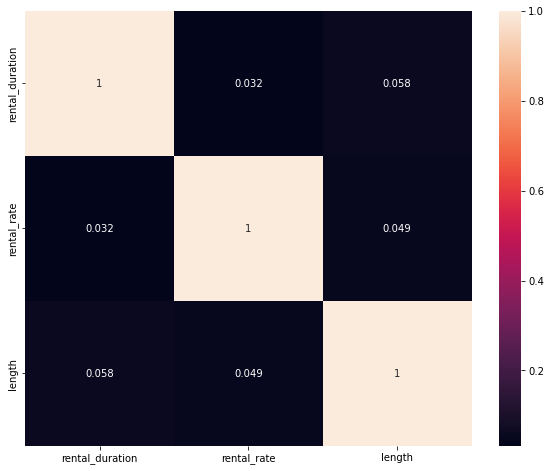

In [25]:
corr_matrix=data_total.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Split x/y

In [26]:
y=data_total['rentjuly_is_bigger']
X=data_total.drop('rentjuly_is_bigger', axis=1)
#train test split:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(720, 8)
(180, 8)
(720,)
(180,)


### Train/Test split

In [28]:
X_train_num=X_train[['rental_duration','rental_rate','length']]
X_test_num=X_test[['rental_duration','rental_rate','length']]
display(X_train_num)

,rental_duration,rental_rate,length
268,5,2.99,131
830,3,0.99,164
264,4,2.99,172
754,5,0.99,75
221,5,4.99,61
...,...,...,...
855,3,0.99,112
871,4,4.99,59
835,4,2.99,145
792,6,2.99,152


In [29]:
X_train_cat=X_train[['rating','category_name']]
X_test_cat=X_test[['rating','category_name']]
X_train_cat
X_test_cat

,rating,category_name
433,G,New
789,PG-13,Music
687,R,Comedy
24,NC-17,Action
482,NC-17,Animation
...,...,...
247,G,Games
566,PG-13,Drama
272,PG-13,Games
227,NC-17,Animation


### Encode categorical columns

In [35]:
cat_columns = ['rating','category_name']
cat_columns_values = [data_total[col].unique().tolist() for col in cat_columns]

In [44]:
encoder = OneHotEncoder(drop = 'first', categories = cat_columns_values)
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray() 
#cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out())
X_train_cat_encoded.head()

,rating_NC-17,rating_G,rating_PG-13,rating_R,category_name_Horror,category_name_Family,category_name_Foreign,category_name_Comedy,category_name_Sports,category_name_Music,category_name_Animation,category_name_Action,category_name_New,category_name_Sci-Fi,category_name_Classics,category_name_Games,category_name_Children,category_name_Travel,category_name_Drama
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
X_test_cat_encoded = encoder.transform(X_test_cat).toarray() 
#cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=encoder.get_feature_names_out()) 
X_test_cat_encoded.head()

,rating_NC-17,rating_G,rating_PG-13,rating_R,category_name_Horror,category_name_Family,category_name_Foreign,category_name_Comedy,category_name_Sports,category_name_Music,category_name_Animation,category_name_Action,category_name_New,category_name_Sci-Fi,category_name_Classics,category_name_Games,category_name_Children,category_name_Travel,category_name_Drama
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Numericals, scaling data

In [46]:

#Scaling
transformer=MinMaxScaler().fit(X_train_num)
X_train_normalized=transformer.transform(X_train_num)
X_train_norm= pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [47]:
X_train_norm.head()

,rental_duration,rental_rate,length
0,0.50,0.5,0.611511
1,0.00,0.0,0.848921
2,0.25,0.5,0.906475
3,0.50,0.0,0.208633
4,0.50,1.0,0.107914


In [63]:
# X_test_num to norm

X_test_normalized = transformer.transform(X_test_num)

X_test_norm = round(pd.DataFrame(X_test_normalized, columns=X_test_num.columns),2)

X_test_norm.head()

,rental_duration,rental_rate,length
0,0.25,0.5,0.54
1,0.25,0.0,0.13
2,1.00,1.0,0.98
3,0.50,0.5,0.88
4,0.50,0.5,0.20


In [64]:
X_train_transformed = pd.concat([X_train_norm, X_train_cat_encoded], axis=1)
X_test_transformed = pd.concat([X_test_norm, X_test_cat_encoded], axis=1)

#final_df = pd.concat([X_train_transformed, X_test_transformed], axis=0)

In [65]:
classification=LogisticRegression(random_state=0, solver='lbfgs', 
               multi_class='multinomial')
classification.fit(X_train_transformed, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

### Create a logistic regression model to predict this new column from the cleaned data.

In [66]:
X_train_transformed.head()

,rental_duration,rental_rate,length,rating_NC-17,rating_G,rating_PG-13,rating_R,category_name_Horror,category_name_Family,category_name_Foreign,...,category_name_Music,category_name_Animation,category_name_Action,category_name_New,category_name_Sci-Fi,category_name_Classics,category_name_Games,category_name_Children,category_name_Travel,category_name_Drama
0,0.50,0.5,0.611511,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.00,0.0,0.848921,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.5,0.906475,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.50,0.0,0.208633,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.50,1.0,0.107914,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
X_test_transformed.head()

,rental_duration,rental_rate,length,rating_NC-17,rating_G,rating_PG-13,rating_R,category_name_Horror,category_name_Family,category_name_Foreign,...,category_name_Music,category_name_Animation,category_name_Action,category_name_New,category_name_Sci-Fi,category_name_Classics,category_name_Games,category_name_Children,category_name_Travel,category_name_Drama
0,0.25,0.5,0.54,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.13,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,1.0,0.98,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50,0.5,0.88,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.50,0.5,0.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#Now we  can predict:
y_test_pred= classification.predict(X_test_transformed)
print(y_test_pred)
print(accuracy_score(y_test, y_test_pred))
classification.score(X_test_transformed, y_test)

['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Y

0.9888888888888889

In [69]:
y_test_pred= classification.predict(X_test_transformed)
print(y_test_pred)


['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Y

In [70]:

print(classification.score(X_test_transformed, y_test))

0.9888888888888889


In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [83]:
confusion_matrix(y_test, y_test_pred)

array([[  0,   2],
       [  0, 178]], dtype=int64)

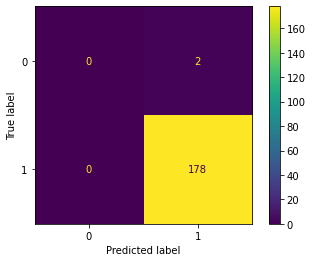

In [85]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

In [ ]:
## I am not sure if this is correct, almost all in true negative